In [9]:
# General libraries
import os
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import os
from PIL import Image
import os
from skimage import io
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix



# Deep learning libraries
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from tensorflow.keras import datasets, layers, models




In [10]:
train_image_binary = ImageDataGenerator(rescale=1/255, zoom_range=0.3, vertical_flip=True,validation_split=.2)
test_image_binary = ImageDataGenerator(rescale=1/255)

In [11]:
#Image generators for importing data and providing validation split for training
train_image = ImageDataGenerator(rescale=1/255,
                                 width_shift_range=0.05,
                                 height_shift_range=0.05,
                                 horizontal_flip=True,
                                 shear_range=10,
                                 brightness_range=[0.95,1.05],
                                 validation_split=.2)

#attempting to create validation data set without augmentations applied to the training set
#random seed is set upon generation of the data, thus should prevent data leakage
validation_image = ImageDataGenerator(rescale=1/255,
                                     validation_split=.2)

test_image = ImageDataGenerator(rescale=1/255)

In [12]:
 train_gen_binary = train_image.flow_from_directory(
    directory='chest_xray/train', 
    target_size=(128, 128),color_mode='grayscale',
    batch_size=32, 
    class_mode='categorical', subset='training',interpolation="lanczos",
    shuffle=True)

Found 4499 images belonging to 2 classes.


In [13]:
val_gen_binary = train_image.flow_from_directory(
    directory='chest_xray/train', 
    target_size=(128, 128),color_mode='grayscale',
    batch_size=32, 
    class_mode='categorical', subset='validation',interpolation="lanczos",
    shuffle=True)

Found 1123 images belonging to 2 classes.


In [14]:
test_gen = test_image.flow_from_directory(
    directory='chest_xray/test', 
    target_size=(128, 128),color_mode='grayscale', 
    batch_size=32, 
    class_mode='categorical',interpolation="lanczos",
    shuffle=True)

Found 624 images belonging to 2 classes.


In [15]:
#training data processing
train_gen_multi = train_image.flow_from_directory(
    directory='chest_xray/train_multi_class', 
    target_size=(128, 128),color_mode='grayscale',
    batch_size=32, 
    class_mode='categorical', subset='training', interpolation="lanczos",
    seed=42)

Found 4186 images belonging to 3 classes.


In [16]:
val_gen_multi = validation_image.flow_from_directory(
    directory='chest_xray/train_multi_class', 
    target_size=(128, 128),color_mode='grayscale',
    batch_size=32, 
    class_mode='categorical', subset='validation', interpolation="lanczos",
    seed=42)

Found 1045 images belonging to 3 classes.


In [17]:
print(train_gen_binary)
print(len(train_gen_binary))


141


In [18]:
train_gen_binary

In [19]:
train_gen_binary[0]

(array([[[[0.3921569 ],
          [0.4039216 ],
          [0.40784317],
          ...,
          [0.2392157 ],
          [0.227451  ],
          [0.227451  ]],
 
         [[0.40000004],
          [0.41176474],
          [0.41960788],
          ...,
          [0.2392157 ],
          [0.227451  ],
          [0.227451  ]],
 
         [[0.41176474],
          [0.42352945],
          [0.43137258],
          ...,
          [0.2392157 ],
          [0.227451  ],
          [0.227451  ]],
 
         ...,
 
         [[0.07843138],
          [0.07843138],
          [0.09019608],
          ...,
          [0.07450981],
          [0.07843138],
          [0.08235294]],
 
         [[0.07843138],
          [0.07843138],
          [0.09019608],
          ...,
          [0.07450981],
          [0.08235294],
          [0.08235294]],
 
         [[0.07843138],
          [0.07843138],
          [0.09019608],
          ...,
          [0.07843138],
          [0.07843138],
          [0.07843138]]],
 
 
        [

In [20]:
X,y = next(train_gen_binary)
print('x: ',type(X))
print('y: ',type(y))
print('x: ',X.shape)
print('y: ',y.shape)


x:  <class 'numpy.ndarray'>
y:  <class 'numpy.ndarray'>
x:  (32, 128, 128, 1)
y:  (32, 2)


In [46]:
model_binary = models.Sequential()
model_binary.add(layers.Conv2D(filters=10,
                        kernel_size=(3, 3),
                        activation='swish',
                        input_shape=(128, 128, 1)))
model_binary.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_binary.add(layers.Conv2D(64, (3, 3), activation='swish'))
model_binary.add(layers.MaxPooling2D((2, 2)))
model_binary.add(layers.Conv2D(32, (3, 3), activation='swish'))
model_binary.add(layers.Flatten())
model_binary.add(layers.Dense(16, activation='swish'))
model_binary.add(layers.Dense(2, activation='sigmoid'))

model_binary.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results_binary = model_binary.fit(train_gen_binary,epochs=30, batch_size=32,validation_data=val_gen_binary)

Epoch 1/2
141/141 [==============================] - 314s 2s/step - loss: 0.3369 - accuracy: 0.8489 - val_loss: 0.1843 - val_accuracy: 0.9359
Epoch 2/2
141/141 [==============================] - 204s 1s/step - loss: 0.2043 - accuracy: 0.9149 - val_loss: 0.1516 - val_accuracy: 0.9341


In [47]:
model_b_recall = models.Sequential()
model_b_recall.add(layers.Conv2D(filters=10,
                        kernel_size=(3, 3),
                        activation='swish',
                        input_shape=(128, 128, 1)))
model_b_recall.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_b_recall.add(layers.Conv2D(64, (3, 3), activation='swish'))
model_b_recall.add(layers.MaxPooling2D((2, 2)))
model_b_recall.add(layers.Conv2D(32, (3, 3), activation='swish'))
model_b_recall.add(layers.Flatten())
model_b_recall.add(layers.Dense(16, activation='swish'))
model_b_recall.add(layers.Dense(2, activation='sigmoid'))

model_b_recall.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['recall'])

results_binary_recall = model_binary.fit(train_gen_binary,epochs=30, validation_data=val_gen_binary)

Epoch 1/2
141/141 [==============================] - 125s 884ms/step - loss: 0.1760 - accuracy: 0.9313 - val_loss: 0.1701 - val_accuracy: 0.9207
Epoch 2/2
141/141 [==============================] - 193s 1s/step - loss: 0.1703 - accuracy: 0.9324 - val_loss: 0.1254 - val_accuracy: 0.9528


In [48]:

#Multi class model with 3 classes normal,p
#Went too deep - trying new activation function in hidden layers
model0 = models.Sequential()

#input layer
model0.add(layers.Conv2D(filters=10,
                        kernel_size=(20, 20),
                        activation='relu',
                        input_shape=(128, 128, 1)))
model0.add(layers.MaxPooling2D(pool_size=(2, 2)))

#hidden layers
model0.add(layers.Conv2D(64, (2, 2), activation='swish'))
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(32, (2, 2), activation='swish'))
model0.add(layers.Flatten())
model0.add(layers.Dense(32, activation='swish'))
model0.add(layers.Dense(16, activation='swish'))
model0.add(layers.Dense(12, activation='swish'))
model0.add(layers.Dense(8, activation='swish'))

#output layer
model0.add(layers.Dense(3, activation='softmax'))

#compile and compute
model0.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'AUC'])
#creating a save file for this model # comement out b/c lack of storage
#model_checkpoint_callback = ModelCheckpoint(filepath="./Checkpoints",
                                           #save_weights_only=True,
                                          # monitor='val_accuracy',
                                           #mode='max',
                                          # save_best_only=True)

multi_class_model = model0.fit(train_gen_multi, epochs=50, validation_data=val_gen_multi)#, callbacks=model_checkpoint_callback)


Epoch 1/2
131/131 [==============================] - 232s 2s/step - loss: 0.9489 - accuracy: 0.5645 - auc: 0.7244 - val_loss: 0.6681 - val_accuracy: 0.6909 - val_auc: 0.8783
Epoch 2/2
131/131 [==============================] - 300s 2s/step - loss: 0.7251 - accuracy: 0.6725 - auc: 0.8485 - val_loss: 0.6147 - val_accuracy: 0.7474 - val_auc: 0.9020


In [49]:
results_binary.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x1d00425d160>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.3368948698043823, 0.2043466866016388],
  'accuracy': [0.8488553166389465, 0.9148699641227722],
  'val_loss': [0.1843169778585434, 0.1515919417142868],
  'val_accuracy': [0.935886025428772, 0.9341050982475281]},
 'params': {'verbose': 1, 'epochs': 2, 'steps': 141},
 'epoch': [0, 1]}

In [50]:
results_binary_recall.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x1d00425d160>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.17601071298122406, 0.1703009456396103],
  'accuracy': [0.9313180446624756, 0.9324294328689575],
  'val_loss': [0.17006134986877441, 0.1253504753112793],
  'val_accuracy': [0.9207479953765869, 0.9528049826622009]},
 'params': {'verbose': 1, 'epochs': 2, 'steps': 141},
 'epoch': [0, 1]}

In [51]:
multi_class_model.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x1d004737640>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.9488559365272522, 0.7251315116882324],
  'accuracy': [0.5645006895065308, 0.6724796891212463],
  'auc': [0.7244207262992859, 0.8485280275344849],
  'val_loss': [0.6680608987808228, 0.6146964430809021],
  'val_accuracy': [0.6909090876579285, 0.7473683953285217],
  'val_auc': [0.8783015608787537, 0.9020271897315979]},
 'params': {'verbose': 1, 'epochs': 2, 'steps': 131},
 'epoch': [0, 1]}

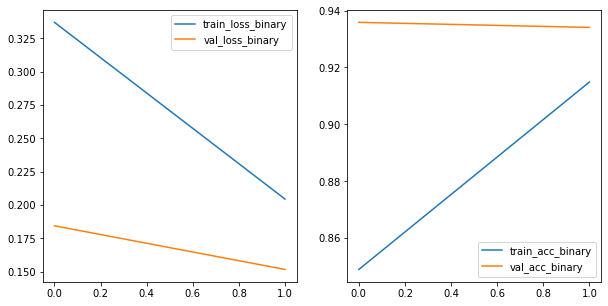

In [52]:
import seaborn as sns

train_loss_binary = results_binary.history['loss']
train_acc_binary = results_binary.history['accuracy']
val_loss_binary = results_binary.history['val_loss']
val_acc_binary = results_binary.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results_binary.epoch, y=train_loss_binary, ax=ax1, label='train_loss_binary')
sns.lineplot(x=results_binary.epoch, y=train_acc_binary, ax=ax2, label='train_acc_binary')

sns.lineplot(x=results_binary.epoch, y=val_loss_binary, ax=ax1, label='val_loss_binary')
sns.lineplot(x=results_binary.epoch, y=val_acc_binary, ax=ax2, label='val_acc_binary');

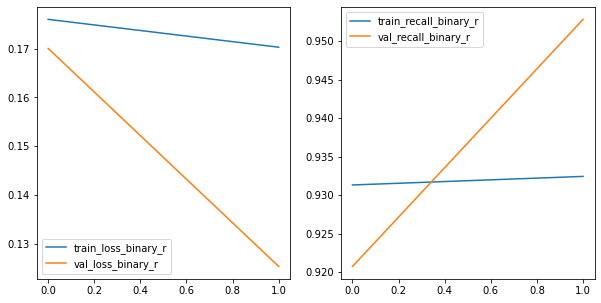

In [53]:
import seaborn as sns

train_loss_binary_r = results_binary_recall.history['loss']
train_recall_binary_r = results_binary_recall.history['accuracy']
val_loss_binary_r = results_binary_recall.history['val_loss']
val_recall_binary_r = results_binary_recall.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results_binary_recall.epoch, y=train_loss_binary_r, ax=ax1, label='train_loss_binary_r')
sns.lineplot(x=results_binary_recall.epoch, y=train_recall_binary_r, ax=ax2, label='train_recall_binary_r')

sns.lineplot(x=results_binary_recall.epoch, y=val_loss_binary_r, ax=ax1, label='val_loss_binary_r')
sns.lineplot(x=results_binary_recall.epoch, y=val_recall_binary_r, ax=ax2, label='val_recall_binary_r');

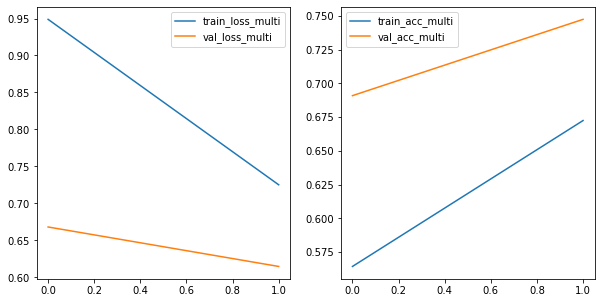

In [54]:
#import seaborn as sns

train_loss_multi = multi_class_model.history['loss']
train_acc_multi = multi_class_model.history['accuracy']
val_loss_multi = multi_class_model.history['val_loss']
val_acc_multi = multi_class_model.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=multi_class_model.epoch, y=train_loss_multi, ax=ax1, label='train_loss_multi')
sns.lineplot(x=multi_class_model.epoch, y=train_acc_multi, ax=ax2, label='train_acc_multi')

sns.lineplot(x=multi_class_model.epoch, y=val_loss_multi, ax=ax1, label='val_loss_multi')
sns.lineplot(x=multi_class_model.epoch, y=val_acc_multi, ax=ax2, label='val_acc_multi');

In [55]:
test_loss_recall, test_acc_recall = results_binary_recall.evaluate(test_gen[0], test_gen[1])

AttributeError: 'History' object has no attribute 'evaluate'

In [52]:
test_loss_binary, test_acc_binary = results_binary.evaluate(test_gen[0], test_gen[1])

AttributeError: 'History' object has no attribute 'evaluate'

In [ ]:
test_loss_multi, test_acc_multi = multi_class_model.evaluate(test_gen[0], test_gen[1])

In [45]:
results_binary.predict(test_gen_binary[0])

AttributeError: 'History' object has no attribute 'predict'

In [48]:
results_binary_recall.predict(test_gen[0])

AttributeError: 'History' object has no attribute 'predict'

In [ ]:
results_.predict(test_gen[0])

In [ ]:
print(test_acc_binary)

In [ ]:
print(test_acc_recall)

In [ ]:
print(test_acc_multi)

In [53]:
results_binary.summary()

AttributeError: 'History' object has no attribute 'summary'

In [54]:
results_binary_recall.summary()

AttributeError: 'History' object has no attribute 'summary'

In [ ]:
multi_class_model.summary()

In [ ]:
results_binary.predict(test_gen[0]).sum()

In [ ]:
results_binary_recall.predict(test_gen[0]).sum()

In [ ]:
multi_class_model.predict(test_gen[0]).sum()

In [ ]:
np.argmax(results_binary.predict(test_gen[0]))

In [ ]:
np.argmax(results_binary_recall.predict(test_gen[0]))

In [ ]:
np.argmax(multi_class_model.predict(test_gen[0]))

In [ ]:
plt.imshow(test_gen[0]);